# Выходные диаграммы

In [15]:
import vk
import os
SERVICE_API_TOKEN = os.getenv('SERVICE_API_TOKEN')
GROUP_API_TOKEN = os.getenv('GROUP_API_TOKEN')
session = vk.Session(access_token=SERVICE_API_TOKEN)
vk_api = vk.API(session)

def get_group_id(group_name: str):
    res = vk_api.groups.getById(group_id=group_name, v=5.126)
    return res[0]['id']

## Круговая диаграмма политических взглядов:

Диаграмма политических взглядов navalny_live


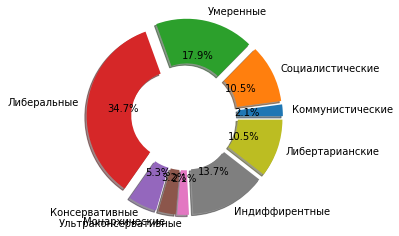




Прошло времени 8.208678258000077


In [13]:
start_time = time.monotonic()

GROUP = 'navalny_live'
groupid = get_group_id(GROUP)

POLITICAL_DICT = {
    1: 'Коммунистические',
    2: 'Социалистические',
    3: 'Умеренные',
    4: 'Либеральные',
    5: 'Консервативные',
    6: 'Монархические',
    7: 'Ультраконсервативные',
    8: 'Индиффирентные',
    9: 'Либертарианские',
    
}


vk_api.groups.getMembers(group_id=groupid, v=5.126)
response = vk_api.groups.getMembers(group_id=groupid, v=5.126)  # Первое выполнение метода
userids = response["items"]  # Присваиваем переменной первую тысячу id'шников
# print(userids)
count = response["count"] // 1000
data = vk_api.users.get(user_ids=userids, v=5.126, fields='personal')
users_list = []
for i in range(1, count+1):
    userids.append(vk_api.groups.getMembers(group_id=groupid, v=5.126, offset=i*1000)['items'])

if len(data) > 1000:
    for i in range((len(userids)//1000)+1):
        data.append(vk_api.users.get(user_ids=userids[i*1000:], v=5.126, fields='personal'))


         
political_opinion = [user['personal']['political'] for user in data  if 'personal' in user.keys()  and isinstance(user['personal'], dict) and 'political' in user['personal'].keys()]



import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

political_options = set(political_opinion)

graph_dict = {POLITICAL_DICT[option]:political_opinion.count(option) for option in political_options}


vals = graph_dict.values()
labels = graph_dict.keys()
explode = [0.1 for i in range(len(vals))]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops=dict(width=0.5), rotatelabels=False, explode=explode)
ax.axis("equal")
# fig.savefig('test.svg')
print(f'Диаграмма политических взглядов {GROUP}')
plt.show()
print(f'\n\n\nПрошло времени {time.monotonic() - start_time}')

## График пересечения аудиторий:

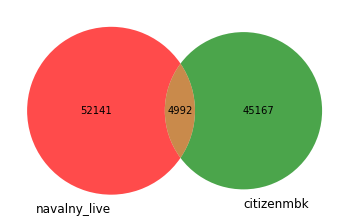




Прошло времени 13.009880819000045


In [14]:
"""
Пересечение аудиторий групп
"""
start_time = time.monotonic()

GROUP_ONE = 'navalny_live'
GROUP_TWO = 'citizenmbk'

first_groupid = get_group_id(GROUP_ONE)
first = vk_api.groups.getMembers(group_id=first_groupid, v=5.126)  # Первое выполнение метода
first_data = first["items"]  # Присваиваем переменной первую тысячу id'шников
count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
# С каждым проходом цикла смещение offset увеличивается на тысячу
# и еще тысяча id'шников добавляется к нашему списку.
for i in range(1, count+1):  
    first_data = first_data + vk_api.groups.getMembers(group_id=first_groupid, v=5.126, offset=i*1000)["items"]
    
second_groupid = get_group_id(GROUP_TWO)
second = vk_api.groups.getMembers(group_id=second_groupid, v=5.126)
second_data = second['items']
count = second['count'] // 1000

for i in range(1, count+1):
    second_data = second_data + vk_api.groups.getMembers(group_id=second_groupid, v=5.126, offset=i*1000)["items"]
    

first_len = len(first_data)
second_len = len(second_data)
join_len = len(list(set(first_data)&set(second_data)))

import matplotlib
from matplotlib_venn import venn2
import matplotlib.pyplot as plt


%matplotlib inline


venn2(subsets = (first_len, second_len, join_len), set_labels=(GROUP_ONE, GROUP_TWO), alpha=0.7)


plt.show()
print(f'\n\n\nПрошло времени {time.monotonic() - start_time}')